In [16]:
import numpy as np
import torch
import umap
from utils import get_coords, plot_diagrams
from gudhi.clustering.tomato import Tomato
from collections import Counter
import matplotlib.pyplot as plt
from ripser import ripser

In [39]:
neurons = torch.load("activations/ILSVRC2015/inception4e.pt").detach().numpy().T
print(neurons.shape)

(832, 50761)


In [40]:
layout_2d = umap.UMAP(
    n_components=2, verbose=True, n_neighbors=20, min_dist=0.01, metric="cosine"
).fit_transform(neurons)

UMAP(angular_rp_forest=True, metric='cosine', min_dist=0.01, n_neighbors=20, verbose=True)
Wed Feb  9 21:56:47 2022 Construct fuzzy simplicial set
Wed Feb  9 21:57:04 2022 Finding Nearest Neighbors
Wed Feb  9 21:57:04 2022 Finished Nearest Neighbor Search
Wed Feb  9 21:57:04 2022 Construct embedding


Epochs completed:   0%|            0/500 [00:00]

Wed Feb  9 21:57:05 2022 Finished embedding


/opt/homebrew/Caskroom/miniforge/base/envs/act/lib/python3.9/site-packages/gudhi/point_cloud/dtm.py:164: RuntimeWarning: overflow encountered in power
  distances = distances ** q


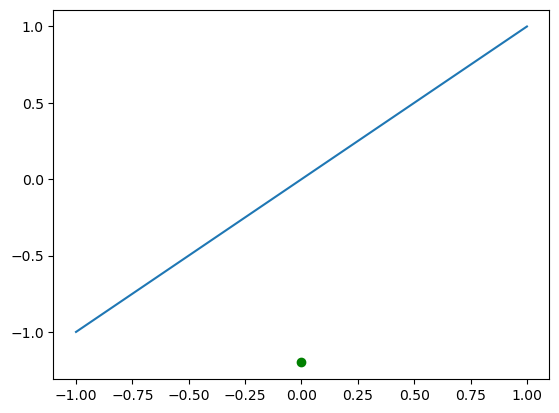

1
[(0, 832)]


In [41]:
t = Tomato(density_type="DTM", k=100)
clusters = t.fit_predict(neurons)
t.plot_diagram()
print(t.n_clusters_)
print(Counter(t.labels_).most_common(10))

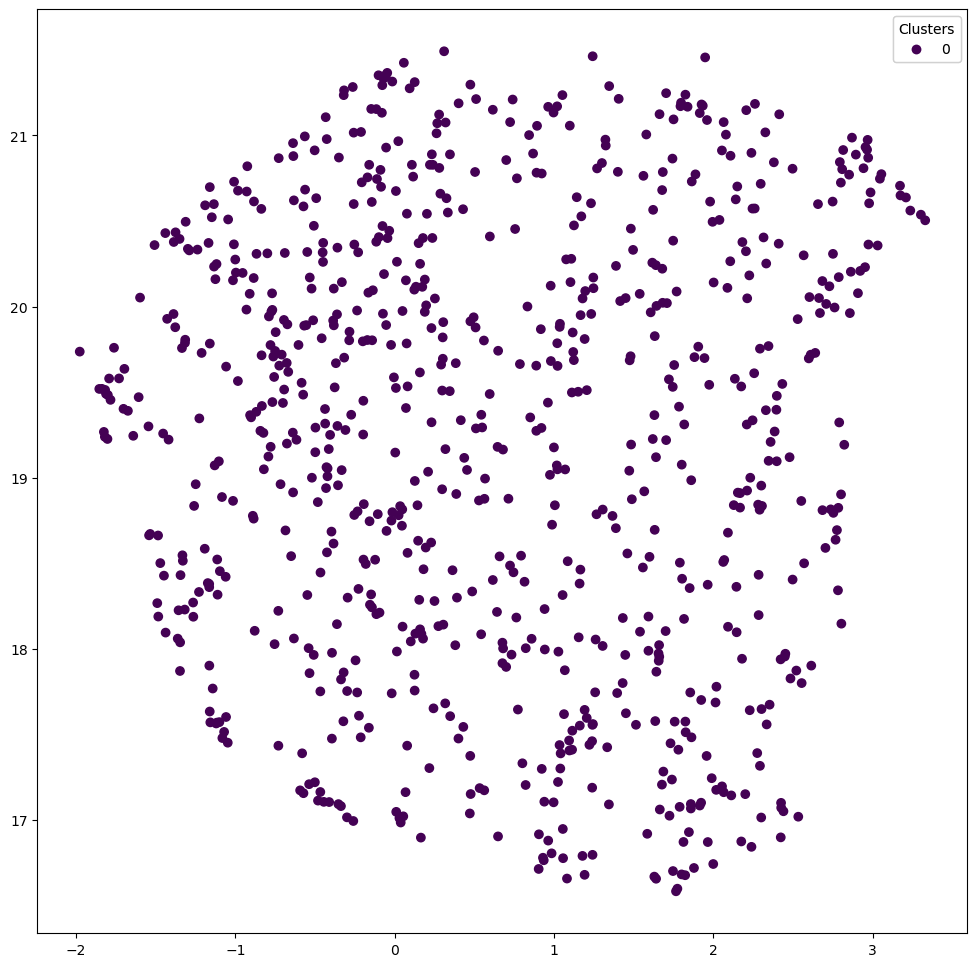

In [42]:
fig, ax = plt.subplots(figsize=(12, 12))
scatter = ax.scatter(x=layout_2d[:, 0], y=layout_2d[:, 1], c=clusters)
legend = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend)

plt.show()

/opt/homebrew/Caskroom/miniforge/base/envs/act/lib/python3.9/site-packages/ripser/ripser.py:253: UserWarning: The input point cloud has more columns than rows; did you mean to transpose?
  warnings.warn(


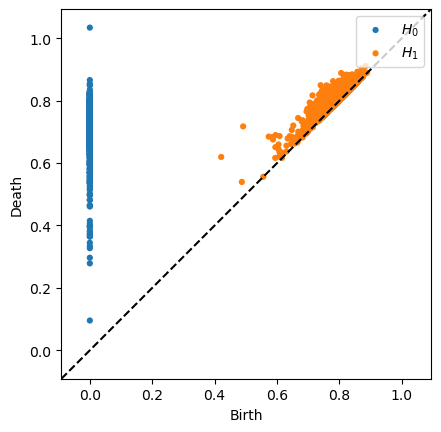

In [43]:
maxdim = 1
coeff = 47
metric = "cosine"  # cosine, euclidean
persistence = ripser(
    neurons, maxdim=maxdim, coeff=coeff, do_cocycles=True, metric=metric
)
fig, ax = plt.subplots()
plot_diagrams(persistence["dgms"], plot_only=np.arange(maxdim + 1), ax=ax, show=True)

In [45]:
diagrams = persistence[
    "dgms"
]  # the multiset describing the lives of the persistence classes
cocycles = persistence["cocycles"][
    1
]  # the cocycle representatives for the 1-dim classes
births1 = diagrams[1][:, 0]  # the time of birth for the 1-dim classes
deaths1 = diagrams[1][:, 1]  # the time of death for the 1-dim classes
lives1 = deaths1 - births1  # the lifetime for the 1-dim classes
iMax = np.argsort(lives1)

threshold = births1[iMax[-1]] + (deaths1[iMax[-1]] - births1[iMax[-1]]) * (9 / 10)

cocycle = cocycles[iMax[-1]]

f, verts = get_coords(cocycle, threshold, len(neurons), M, 47)

print(len(f))

NameError: name 'M' is not defined